In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Adult income\\new_data.csv")
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,3.663562,State-gov,77516,Bachelors,13,Others,Others,Others,White,Male,2174,0,40.000000,United-States,<=50K
1,3.912023,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,15.742598,United-States,<=50K
2,3.637586,Private,215646,HS-grad,9,Others,Others,Others,White,Male,0,0,40.000000,United-States,<=50K
3,3.970292,Private,234721,Others,7,Married-civ-spouse,Others,Husband,Others,Male,0,0,40.000000,United-States,<=50K
4,3.332205,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Others,Female,0,0,40.000000,Others,<=50K


In [3]:
data = data.drop(['fnlwgt','Education-Num'], axis=1)

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
def validation_cross(model, x,y):
    model.fit(x, y)

    #Predict training set:
    pred = model.predict(x)

    #Perform cross-validation:
    cv_score = cross_val_score(model, x, y, cv=10, scoring='accuracy')
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy_score: %.4g" %model.score(x,y))
    print ("CV Score : Mean - %.4g | Std - %.4g" % (np.mean(cv_score),np.std(cv_score)))
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(y.values, pred)))
    print("")
    
    print ("Classification Report...")
    print (classification_report(y,pred))
    cm = confusion_matrix(y,pred)
    plt.figure(figsize = [6,3])
    print ("Confusion Matrix..")
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
target_map = {'<=50K': 0, '>50K':1}
edu_map = {'Bachelors':5, 'HS-grad':1, 'Others':0, 'Masters':6, 'Some-college':2,
       'Assoc-acdm':4, 'Assoc-voc':3, 'Doctorate':8, 'Prof-school':7}

data['Target'] = data['Target'].map(target_map)
data['Education'] = data['Education'].map(edu_map)

In [6]:
XX = data.drop(['Target'], axis=1)
y = data['Target']

cat_feat1 = ['Workclass','Martial Status','Occupation','Relationship','Race','Sex','Country']
XX = pd.get_dummies(XX, columns=cat_feat1)

In [7]:
XX.columns

Index(['Age', 'Education', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Others',
       'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Martial Status_Married-AF-spouse', 'Martial Status_Married-civ-spouse',
       'Martial Status_Others', 'Occupation_Craft-repair',
       'Occupation_Exec-managerial', 'Occupation_Others',
       'Occupation_Prof-specialty', 'Occupation_Protective-serv',
       'Occupation_Sales', 'Occupation_Tech-support',
       'Occupation_Transport-moving', 'Relationship_Husband',
       'Relationship_Others', 'Relationship_Wife', 'Race_Asian-Pac-Islander',
       'Race_Others', 'Race_White', 'Sex_Female', 'Sex_Male', 'Country_Others',
       'Country_United-States'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX = sc.fit_transform(XX)

### LogisticRegression


Model Report
Accuracy_score: 0.8518
CV Score : Mean - 0.9229 | Std - 0.002387
RMSE : 0.3849

Classification Report...
             precision    recall  f1-score   support

          0       0.88      0.93      0.91     24720
          1       0.74      0.59      0.66      7841

avg / total       0.85      0.85      0.85     32561

Confusion Matrix..


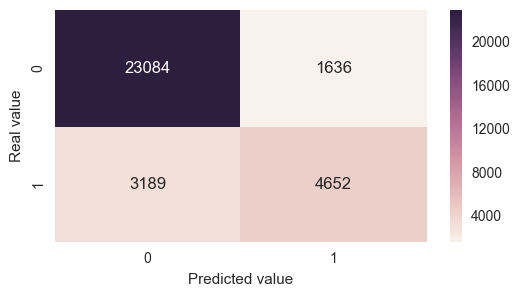

In [9]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
validation_cross(lr, XX, y)

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


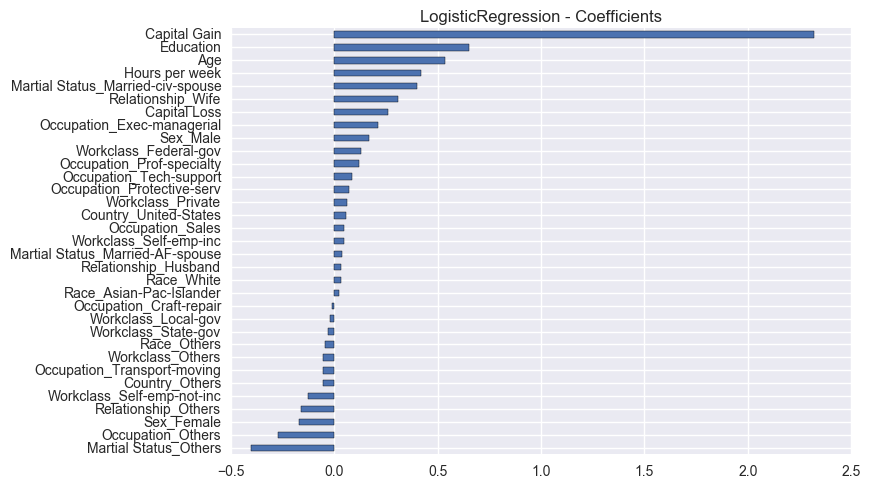

In [10]:
import seaborn as sns
predictors = ['Age', 'Education', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Others',
       'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Martial Status_Married-AF-spouse', 'Martial Status_Married-civ-spouse',
       'Martial Status_Others', 'Occupation_Craft-repair',
       'Occupation_Exec-managerial', 'Occupation_Others',
       'Occupation_Prof-specialty', 'Occupation_Protective-serv',
       'Occupation_Sales', 'Occupation_Tech-support',
       'Occupation_Transport-moving', 'Relationship_Husband',
       'Relationship_Others', 'Relationship_Wife', 'Race_Asian-Pac-Islander',
       'Race_Others', 'Race_White', 'Sex_Female', 'Sex_Male', 'Country_Others',
       'Country_United-States']

coefs = pd.Series(lr.coef_[0], index=predictors)
coefs.sort()
coefs.plot(kind="barh")
plt.title("LogisticRegression - Coefficients")

### RandomForest


Model Report
Accuracy_score: 0.9609
CV Score : Mean - 0.9179 | Std - 0.003035
RMSE : 0.1977

Classification Report...
             precision    recall  f1-score   support

          0       0.96      0.98      0.97     24720
          1       0.95      0.89      0.92      7841

avg / total       0.96      0.96      0.96     32561

Confusion Matrix..


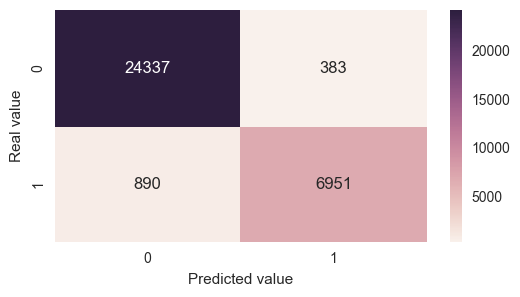

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
validation_cross(rf, XX, y)

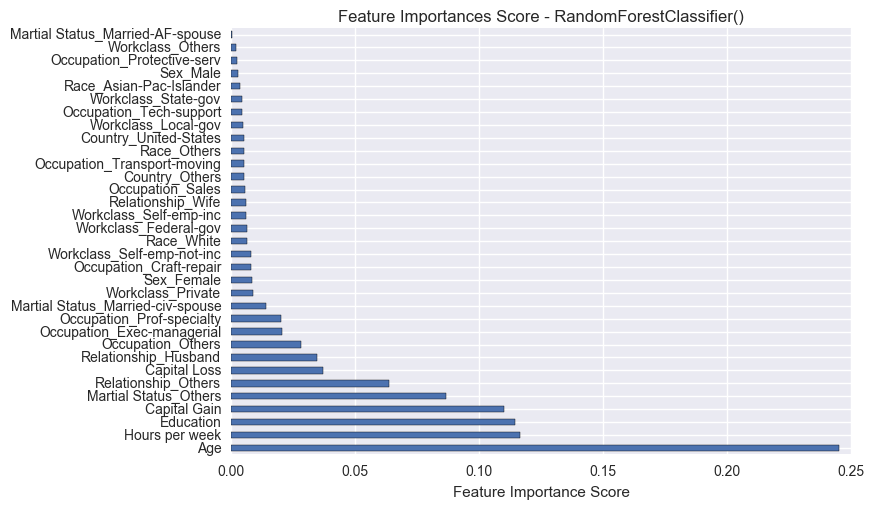

In [13]:
predictors1 = ['Age', 'Education', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Others',
       'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Martial Status_Married-AF-spouse', 'Martial Status_Married-civ-spouse',
       'Martial Status_Others', 'Occupation_Craft-repair',
       'Occupation_Exec-managerial', 'Occupation_Others',
       'Occupation_Prof-specialty', 'Occupation_Protective-serv',
       'Occupation_Sales', 'Occupation_Tech-support',
       'Occupation_Transport-moving', 'Relationship_Husband',
       'Relationship_Others', 'Relationship_Wife', 'Race_Asian-Pac-Islander',
       'Race_Others', 'Race_White', 'Sex_Female', 'Sex_Male', 'Country_Others',
       'Country_United-States']
feat_imp = pd.Series(rf.feature_importances_, predictors1).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances Score - RandomForestClassifier()')
plt.xlabel('Feature Importance Score')
plt.savefig("feat_imp.png")

### Model Comparison

In [15]:
clf = LogisticRegression()
clf.fit(XX, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
clf1 = RandomForestClassifier()
clf1.fit(XX, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

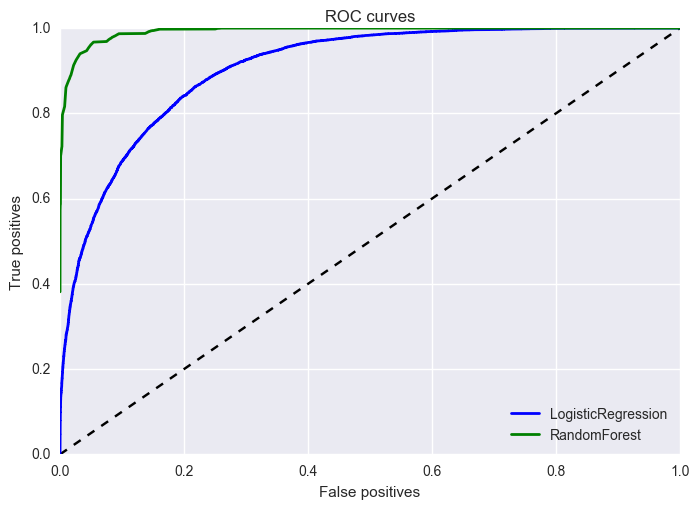

In [19]:
from sklearn import metrics
import pandas as pd

preds = clf.predict_proba(XX)[:,1]
preds1 = clf1.predict_proba(XX)[:,1]

fpr, tpr, _ = metrics.roc_curve(y, preds)
fpr1, tpr1, __ = metrics.roc_curve(y, preds1)

area = metrics.auc(fpr,tpr)
area1 = metrics.auc(fpr1,tpr1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='b', linewidth=2, label='LogisticRegression')
plt.plot(fpr1, tpr1, color='g', linewidth=2, label='RandomForest')
plt.title("ROC curves")
plt.legend(loc = 'lower right')
plt.xlabel("False positives")
plt.ylabel("True positives")